1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function 
- How many global minima are there, and what is the function value at those points? 
- What happens for an initial guess of $(x, y) = (0, 0)$? 

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import csv
import scipy.stats
import seaborn as sns
import matplotlib.mlab as mlab
from matplotlib import pylab
from pylab import *

%matplotlib inline

xMin =  0.0 
yMin =  0.0

Actually, since (0,0) is a saddle point (as the following plots show) the optimize.minimize() function used is not working well


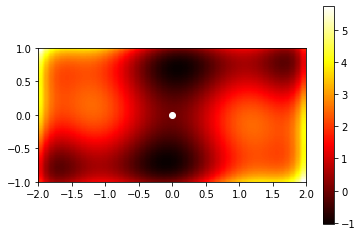

In [2]:
#Function definition
def f(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)


x = np.linspace(-2, 2)
y = np.linspace(-1, 1)

#Grid for plotting
xg, yg = np.meshgrid(x, y)

#find minimum
xMin = sc.optimize.minimize(f, x0=[0, 0])
print('xMin = ',xMin.x[0], '\nyMin = ',xMin.x[1])


#2D function
plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1], cmap = 'hot')
plt.colorbar()

#Plotting as a dot the absolute minimum 
plt.scatter(xMin.x[0], xMin.x[1], color = 'white')

print('\nActually, since (0,0) is a saddle point (as the following plots show) the optimize.minimize() function used is not working well')


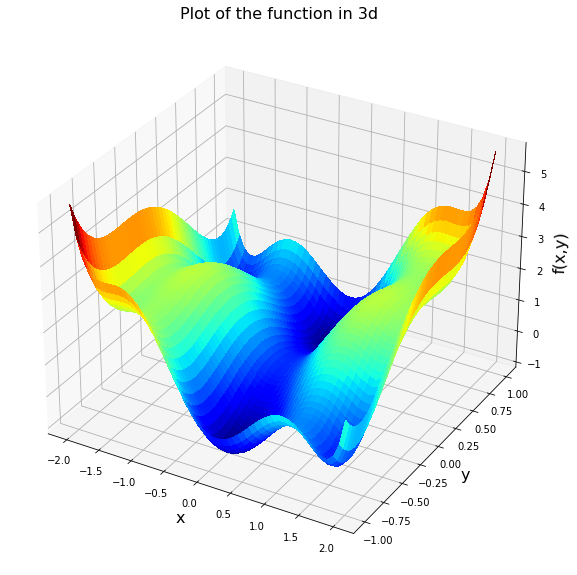

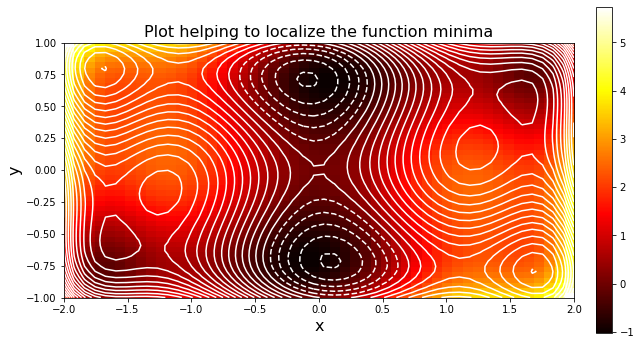

In [3]:
#Printing the function in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, f([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_zlabel('f(x,y)',fontsize=16)
ax.set_title('Plot of the function in 3d',fontsize=16)


#plot in order to localize other minima

plt.figure(figsize=(10,6))
fig2 = plt.imshow(f([xg, yg]), cmap='hot',extent=[-2, 2, -1, 1])
heights = np.arange(-2, 7, 0.2)
plt.colorbar(fig2, fraction=0.046, pad=0.04)

plt.contour(xg, yg, f([xg, yg]), levels=heights, colors='white')
plt.title('Plot helping to localize the function minima',fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [4]:
print('Now that we know that there are 6 local minima (+ the saddle point) we can try to find the absolute minima of the function.\n')
#since scipy.optimize.minimize() offers many methods of minimization, we can try to use many of them and see the result

#setting initial guess looking at the figure (suppose to get two specular points)
x0 = [-1,-1]
x1 = [1,1]

methods = ['Nelder-Mead', 'Powell','CG', 'BFGS' ,'L-BFGS-B', 'TNC', 'COBYLA' , 'SLSQP']

for i in methods:
    print('By using',i,'method, the minima are',sc.optimize.minimize(f, x0, method = i).x,',',sc.optimize.minimize(f, x1, method = i).x)

#since by changing x-y sign the function results even

Now that we know that there are 6 local minima (+ the saddle point) we can try to find the absolute minima of the function.

By using Nelder-Mead method, the minima are [ 0.08986599 -0.71268205] , [-0.08986599  0.71268205]
By using Powell method, the minima are [ 0.09003343 -0.7129541 ] , [ 0.08984201 -0.71265645]
By using CG method, the minima are [-0.08984194  0.71265632] , [ 0.08984193 -0.71265633]
By using BFGS method, the minima are [-0.08984198  0.71265633] , [ 0.08984197 -0.71265635]
By using L-BFGS-B method, the minima are [-0.08984152  0.71265878] , [ 0.08984151 -0.71265879]
By using TNC method, the minima are [-0.08984232  0.71265534] , [ 0.08985304 -0.71264739]
By using COBYLA method, the minima are [ 0.08986837 -0.71259151] , [ 0.08984108 -0.71274973]
By using SLSQP method, the minima are [ 0.08986813 -0.71267149] , [-0.08986698  0.71267079]


In [5]:
#finding function value in all the minima to check wether the previous ones found are the absolute ones
def findMinima(f,x0):
    return sc.optimize.minimize(f, x0) 

#By looking at the figure we can guess the initial points to use in order to find the minima
x0 = [[0.,0.7],[0.,-0.7],[-1.8,0.8],[1.8,-0.8],[1.8,0.8],[-1.8,0.8]]

#used to store min value and compare 
minimum1 , minimum2, fMin = 0,0,0
minima = []
#looping over initial points given
for x in x0:
    solution = findMinima(f,x)
    print(solution.x)
    if (f(solution.x)<fMin):
        minimum1 = solution.x
        minimum2 = -minimum1
        fMin = f(solution.x)
        
print('\n The two absolute minima, where the function value is',fMin, 'are:\n',minimum1,',', minimum2)

[-0.08984202  0.71265639]
[ 0.08984201 -0.71265641]
[-1.70360672  0.79608358]
[ 1.70360671 -0.7960836 ]
[-0.08984202  0.71265638]
[-1.70360672  0.79608358]

 The two absolute minima, where the function value is -1.0316284534898772 are:
 [ 0.08984201 -0.71265641] , [-0.08984201  0.71265641]


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [6]:
yMax = [17,19,21,28,33,38,37, 37, 31,23,19,18]
yMin= [-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = [1,2,3,4,5,6,7,8,9,10,11,12]

[]

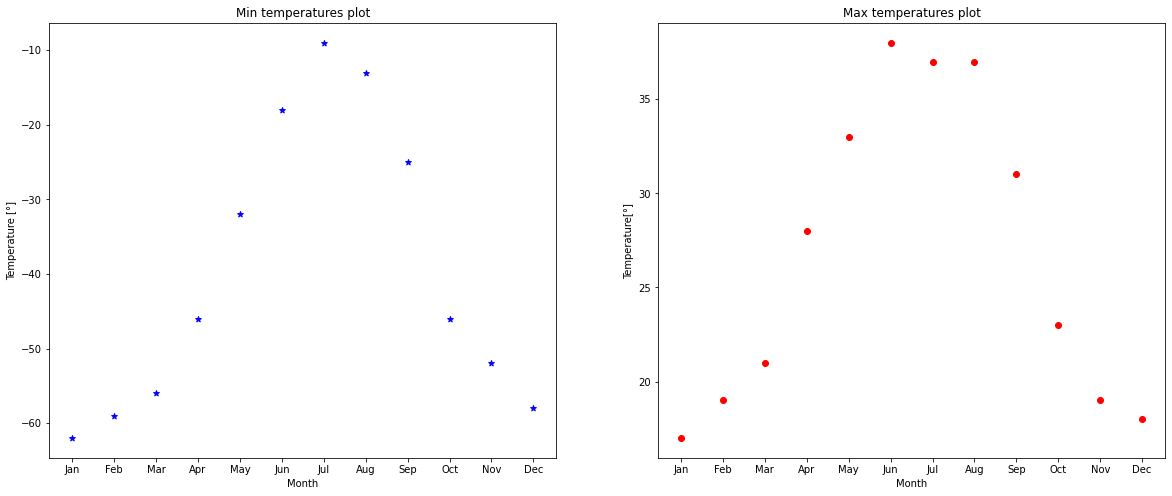

In [7]:
#plotting temperatures

fig, ax = plt.subplots(nrows=1, ncols=2, sharex='row', figsize=(20,8))

#set titles
ax[1].set_title('Max temperatures plot')
ax[0].set_title('Min temperatures plot')


#set labels
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Temperature[°]')

ax[0].set_xlabel('Month')
ax[0].set_ylabel('Temperature [°]')

ax[1].scatter(months, yMax, color ='red')
ax[0].scatter(months,yMin, color = 'blue', marker = '*')

plt.plot()

Centroid of min temperatures fit: 7.164525958032852 
Centroid of max temperatures fit: 6.735815387977477
λ = 4.638125500126501 wich using the following scale:

0<λ<1 --> Excellent compatibility
1<λ<2 --> Good compatibility
2<λ<3 --> Sufficient compatibility
λ>3 --> Incompatibility

Gives as a result that the two results are not compatible.


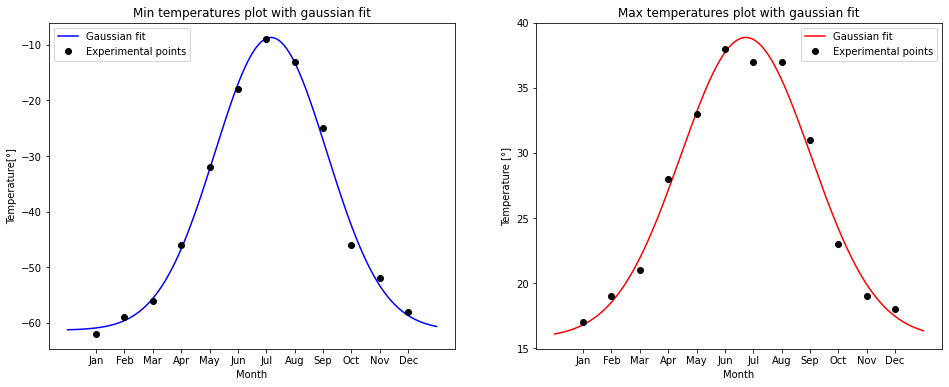

In [8]:
#it seems a gaussian..
from scipy.optimize import curve_fit

def func(x, a, b, c, N):
    return a * np.exp(-(x-b)**2/(2*c**2))+N

fitMin, covMin = curve_fit(f = func, xdata = x, ydata = yMin)
fitMax, covMax = curve_fit(f = func, xdata = x, ydata = yMax)

fig, ax = plt.subplots(nrows=1, ncols=2, sharex='row', figsize=(16,6))

#set titles
ax[0].set_title('Min temperatures plot with gaussian fit')
ax[1].set_title('Max temperatures plot with gaussian fit')


#set labels
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Temperature[°]')

ax[1].set_xlabel('Month')
ax[1].set_ylabel('Temperature [°]')

#use this binning to have a better gaussian 
binning = np.linspace(0, 13, 1000)

ax[0].plot(binning,func(binning,*fitMin), label = 'Gaussian fit', linestyle = '-', color = 'b')
ax[0].plot(x,yMin, marker = 'o', linestyle='', label = 'Experimental points', color = 'black')
ax[0].set_xticks(1+np.arange(len(months)))
ax[0].set_xticklabels(months)

ax[1].plot(binning,func(binning,*fitMax), label = 'Gaussian fit',linestyle = '-', color = 'r')
ax[1].plot(x,yMax, marker = 'o', linestyle='', label = 'Experimental points', color ='black')
ax[1].set_xticks(1+np.arange(len(months)))
ax[1].set_xticklabels(months)

ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper right')

plt.plot()

#printing the 2 offsets
print('Centroid of min temperatures fit:',fitMin[1],'\nCentroid of max temperatures fit:',fitMax[1])


# compute lambda 
compatibility = abs(fitMin[1]-fitMax[1])/(np.sqrt(np.sqrt(np.diag(covMin))[1]**2+np.sqrt(np.diag(covMax))[1]**2))
print('λ =',compatibility, 'wich using the following scale:\n')
print('0<λ<1 --> Excellent compatibility')
print('1<λ<2 --> Good compatibility')
print('2<λ<3 --> Sufficient compatibility')
print('λ>3 --> Incompatibility')
print('\nGives as a result that the two results are not compatible.')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [9]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/


--2021-12-17 07:38:47--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [segue]
--2021-12-17 07:38:47--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc578b15680c0c386efeb4ff7719.dl.dropboxusercontent.com/cd/0/inline/BcAl_9YEaZoHPAd9g-udDUJQyDQtk-gVauVl1soBLotuc8x8O7bg_LrXca8CXOFRNFAenpqOHWTgky2Y7-2v23blUWeYRsdPFyw4ytkbQEvFG2vQEo7KQCVHJpWCVAfLQfU4w-tuwqWDHIQNIeiGAIhP/file# [segue]
--2021-12-17 07:38:48--  https://uc578b15680c0c386efeb4ff7719.dl.dropboxusercontent.com/cd/0/inline/BcAl_9YEaZoHPAd9g-udDUJQyDQtk-

Fit parameters:
μ = -0.08766744260335915 ± 0.008785331787703859
σ = 0.20670059368903757 ± 0.010559841672290057

Since the residuals seems to distribute without any kind of trend (as it can be seen in the following graphs) around the zero, the function fit can be considered correct.


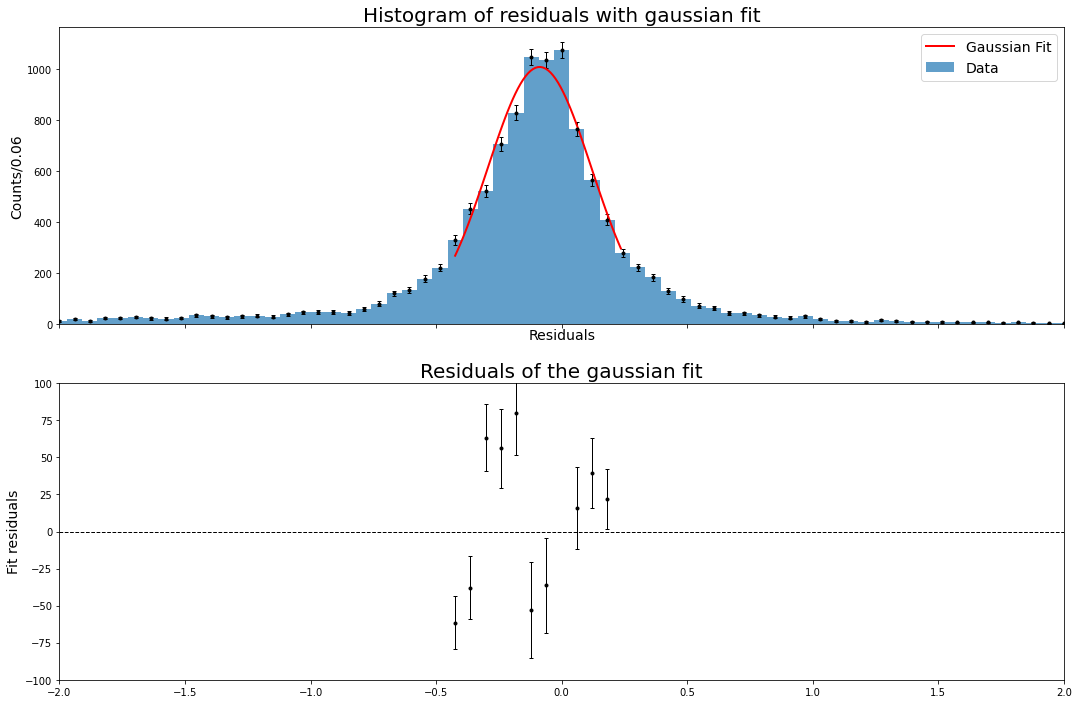

In [10]:
input_file = './data/residuals_261.pkl'
data = np.load(input_file, allow_pickle=True)

def gaussian(x, N, mu, sigma):
    return N*np.exp(-(x-mu)**2/(2*sigma**2))


#converting to Pandas Dataframe
data = pd.DataFrame(data.item()) 
#dataframe.describe()

#Calculate a linear least-squares regression for the two sets 
regression = scipy.stats.linregress(data['distances'], data['residuals'])

#jointplot
#sns.jointplot(data=dataframe, x='distances', y='residuals')

#appropriate binning chosen
binningX = np.linspace(-3, 3, 100)

#finding bin centers
bin_centers = (binningX[1:] + binningX[:-1])/2
binWidth = binningX[1]-binningX[0]


fig, ax = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(18,12))

h,n,_ = ax[0].hist(data['residuals'], bins = binningX, range=(-2,2), label = 'Data', alpha = 0.7)

#adding a column in order to use groupby()
data['bin'] = (np.digitize(data['residuals'], bins=binningX)).astype(float)
y = data.groupby('bin')['residuals'].mean().iloc[:-1]
#setting and plotting Poisson error bars
errors = np.sqrt(h)
ax[0].errorbar( bin_centers, h, yerr = errors, marker = 'o',markerfacecolor = 'black', markeredgecolor = 'black',markersize=3, lw = 0, ecolor='black', elinewidth=1, capsize=2)

parameters, covariance = curve_fit(f = gaussian, xdata = bin_centers[42:53], ydata = h[42:53], sigma = errors[42:53]) 
xg = np.arange(bin_centers[42],bin_centers[53],0.01)
ax[0].plot(xg, gaussian(xg, *parameters), linewidth = 2, linestyle='-', label = 'Gaussian Fit', color = 'r')

ax[0].set_title('Histogram of residuals with gaussian fit', fontsize = 20)
ax[0].set_xlabel('Residuals', fontsize = 14)
ax[0].set_ylabel('Counts/{:.2f}'.format(binWidth), fontsize = 14)                              

ax[0].legend(fontsize=14)

#Get and print parameters
N = parameters[0]
mu, errMu = parameters[1], np.sqrt(np.diag(covariance))[1]
sigma, errSigma = parameters[2], np.sqrt(np.diag(covariance))[2]
print('Fit parameters:')
print('μ =', mu, '±', errMu)
print('σ =', sigma, '±', errSigma)

#computing residuals
res = gaussian(bin_centers,*parameters) - h

fitResiduals = res[42:53]
fitX = bin_centers[42:53]
fitErrors = errors[42:53]

ax[1].errorbar(fitX, fitResiduals, yerr = fitErrors, marker = '.', linewidth = 0, elinewidth= 1 , color = 'black', label = 'Residuals',capsize=2)
ax[1].axhline(color = 'black', linewidth = 1, linestyle = '--')
ax[1].set_ylim( bottom = -100, top = 100)
ax[1].set_xlim( -2, 2)
ax[1].set_ylabel('Fit residuals', fontsize = 14) 
ax[1].set_title('Residuals of the gaussian fit', fontsize = 20)

print('\nSince the residuals seems to distribute without any kind of trend (as it can be seen in the following graphs) around the zero, the function fit can be considered correct.')

Since the p-value is 1.7121382089868575e-10  we can deduce that the fit is not satisfying the attended result.


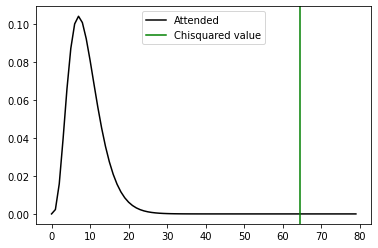

In [11]:
#chi squared test

chiSquared = np.sum(fitResiduals**2/fitErrors**2)
pVal = 1. - sc.stats.chi2.cdf(chiSquared, 9)
print('Since the p-value is', pVal,' we can deduce that the fit is not satisfying the attended result.' )

p = np.arange(0, 80)
plt.plot(p, sc.stats.chi2.pdf(p, df=9), color = 'black', label = 'Attended') 
plt.axvline(chiSquared, color='green', label = 'Chisquared value')
plt.legend(loc = 'best')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [12]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2021-12-17 07:38:49--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [segue]
--2021-12-17 07:38:50--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc1f693500494b4a981e91cbc859.dl.dropboxusercontent.com/cd/0/inline/BcBdKjs-JMTAk73Y64DoZ8TB-xgAyEQ8Ikh8FYW60EIVsXA8uF3FcVVFLcc362RcEDLHAbt1CIfKyw99HKJES7wPOQaAhpH1noC-CHgd2Blsh8TQCLC3EebG5cVF-atjT_T_jUxhFQc1hnSze4yYboom/file# [segue]
--2021-12-17 07:38:50--  https://uc1f693500494

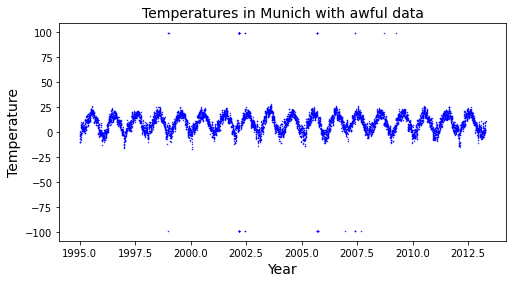

In [13]:
#plotting data
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', delimiter = ' ')
#remove outliers and set range 2008-2012
data2 = data.loc[(data.iloc[:,1] > -40) & (data.iloc[:,1] < 40) & (data.iloc[:,0] >= 2008) & (data.iloc[:,0] <= 2012) ]
data2.to_csv (r'munich_temperatures_average_with_bad_data.csv', index=None)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature', fontsize = 14)
ax.set_title('Temperatures in Munich with awful data', fontsize = 14)

ax.scatter(data.iloc[:,0],data.iloc[:,1], color='b', marker='o', s = 0.2)


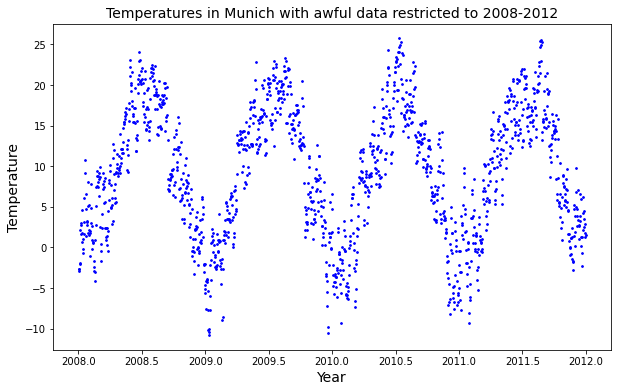

In [14]:
#plotting data
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature', fontsize = 14)
ax.set_title('Temperatures in Munich with awful data restricted to 2008-2012', fontsize = 14)

ax.scatter(data2.iloc[:,0],data2.iloc[:,1], color='b', marker='o', s = 3)

In [15]:
def func(t,a,b,c):
    return a*np.cos(2*np.pi*np.array(t)+b)+c

parameters, covariance = curve_fit(f = func, xdata = data2.iloc[:,0], ydata = data2.iloc[:,1])
fitResult = func(data2.iloc[:,0], parameters[0], parameters[1],parameters[2])

#compute residuals
res = func(data2.iloc[:,0],*parameters) - data2.iloc[:,1]



Overall average temperature in Munich: 9.261252084167237


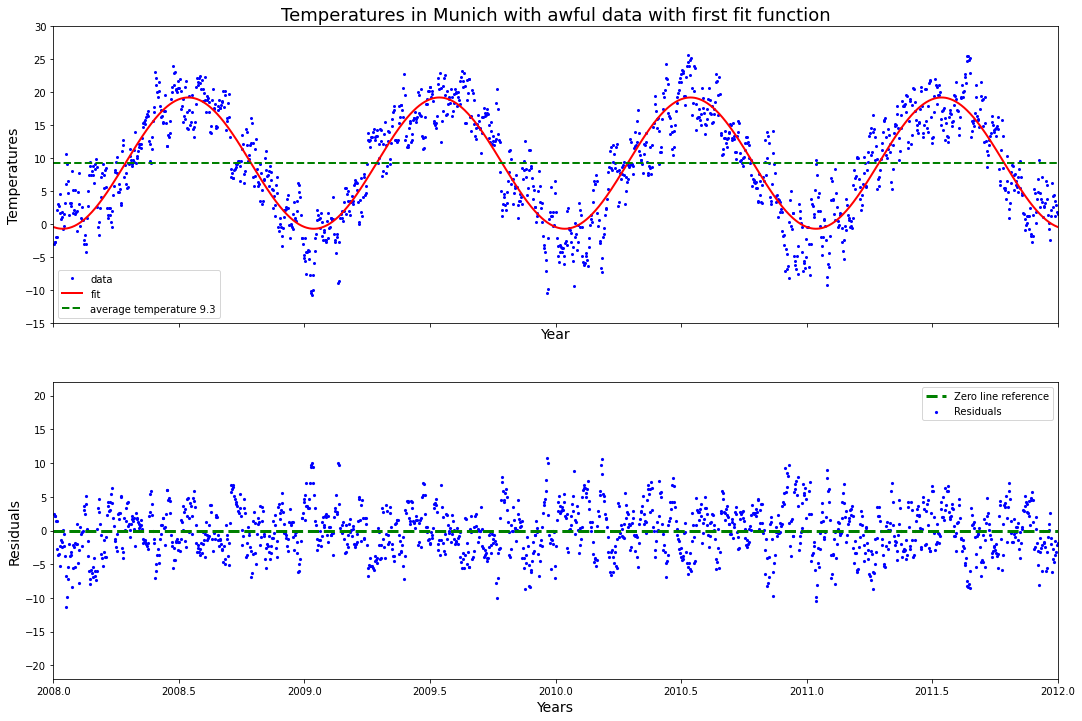

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(18,12))

# b) request
average_temp = np.mean(data2.iloc[:,1])
print('\nOverall average temperature in Munich:', average_temp )


#plotting
ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Temperatures', fontsize = 14)
ax[0].set_title('Temperatures in Munich with awful data with first fit function', fontsize = 18)
ax[0].set_ylim([-15,30])
ax[0].set_xlim([2008,2012])

ax[0].plot(data2.iloc[:,0], data2.iloc[:,1], 'o', label='data', markersize = 2, color = 'b')
ax[0].plot(data2.iloc[:,0], fitResult, '-', label='fit', color = 'r', linewidth = 2)
ax[0].axhline(y=average_temp,  linewidth=2,   ls="dashed", color="g", label=f"average temperature {average_temp:.1f}")
ax[0].legend()

ax[1].scatter(data2.iloc[:,0], res, marker = 'o', lw = 0, color = 'b', label = 'Residuals', s = 10)
ax[1].axhline(color = 'g', linewidth = 3, linestyle = 'dashed', label = 'Zero line reference')
ax[1].set_ylim( bottom = -22, top = 22)
ax[1].set_ylabel('Residuals', fontsize = 14) 
ax[1].set_xlabel('Years', fontsize = 14)
ax[1].legend()

In [17]:
print('Best fit parameters:')
print('a =', parameters[0], '±', np.sqrt(np.diag(covariance))[0])
print('b =', parameters[1], '±', np.sqrt(np.diag(covariance))[1])
print('c =', parameters[2], '±', np.sqrt(np.diag(covariance))[2])



print('\nTypical daily average values for the coldest and hottest time during the year in Munich:\n',func(data2.iloc[:,0], *parameters).min(),' deg\n', func(data2.iloc[:,0], *parameters).max() ,'deg')

# c)
print('\nThe phase parameter added inside the cosine function physically represents the period of the trend followed by the temperatures (12 months)')



Best fit parameters:
a = -9.962034675838556 ± 0.13249837807374445
b = 12.331742861920532 ± 0.013316526800651736
c = 9.262821311069802 ± 0.09374717725467951

Overall average temperature in Munich: 9.261252084167237

Typical daily average values for the coldest and hottest time during the year in Munich:
 -0.6990214785346733  deg
 19.224753433092022 deg

The phase parameter added inside the cosine function physically represents the period of the trend followed by the temperatures (12 months)


Best fit parameters:
a = -9.960743977733971 ± 0.1332634055944778
b = 1.0002934548592652 ± 0.0018838728832020796
c = 8.625535136190726 ± 23.79229283515244
d = 9.265674516254988 ± 0.09554914061263867

Overall average temperature in Munich: 9.261252084167237

Typical daily average values for the coldest and hottest time during the year in Munich:
 -0.6990214785346733  deg
 19.224753433092022 deg

The phase parameter added inside the cosine function physically represents the period of the trend followed by the temperatures (12 months)


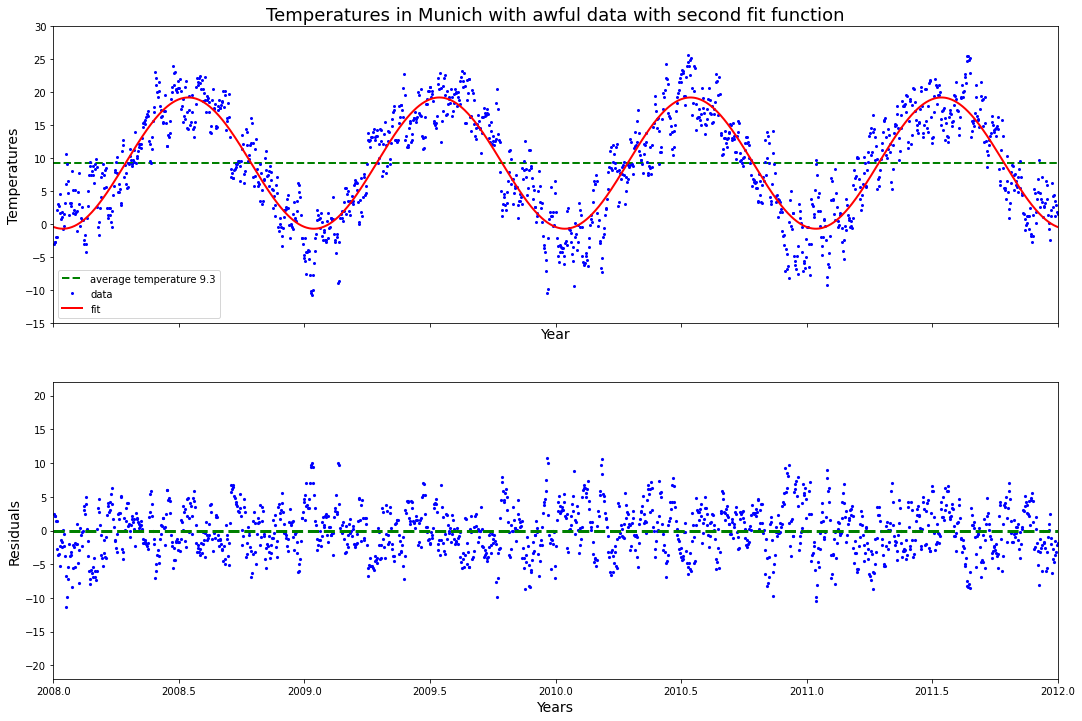

In [41]:
def func2(t,a,b,c,d):
    return a*np.cos(2*np.pi* b *np.array(t)+ c) + d

parameters2, covariance2 = curve_fit(f = func2, xdata = data2.iloc[:,0], ydata = data2.iloc[:,1])
fitResult2 = func2(data2.iloc[:,0], parameters2[0], parameters2[1],parameters2[2],parameters2[3])


#compute residuals
res2 = func2(data2.iloc[:,0],*parameters2) - data2.iloc[:,1]

fig, ax = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(18,12))

ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Temperatures', fontsize = 14)
ax[0].set_title('Temperatures in Munich with awful data with second fit function', fontsize = 18)
ax[0].axhline(y=average_temp,  linewidth=2,   ls="dashed", color="g", label=f"average temperature {average_temp:.1f}")
ax[0].set_ylim([-15,30])
ax[0].set_xlim([2008,2012])

ax[0].plot(data2.iloc[:,0], data2.iloc[:,1], 'o', label='data', markersize = 2, color = 'b')
ax[0].plot(data2.iloc[:,0], fitResult2, '-', label='fit', color = 'r', linewidth = 2)
ax[0].legend()

ax[1].scatter(data2.iloc[:,0], res2, marker = 'o', lw = 0, color = 'b', label = 'Residuals', s = 10)
ax[1].axhline(color = 'g', linewidth = 3, linestyle = 'dashed')
ax[1].set_ylim( bottom = -22, top = 22)
ax[1].set_ylabel('Residuals', fontsize = 14) 
ax[1].set_xlabel('Years', fontsize = 14)

print('Best fit parameters:')
print('a =', parameters2[0], '±', np.sqrt(np.diag(covariance2))[0])
print('b =', parameters2[1], '±', np.sqrt(np.diag(covariance2))[1])
print('c =', parameters2[2], '±', np.sqrt(np.diag(covariance2))[2])
print('d =', parameters2[3], '±', np.sqrt(np.diag(covariance2))[3])

# b) 
print('\nOverall average temperature in Munich:', np.mean(data2.iloc[:,1]))

print('\nTypical daily average values for the coldest and hottest time during the year in Munich:\n',func(data2.iloc[:,0], *parameters).min(),' deg\n', func(data2.iloc[:,0], *parameters).max() ,'deg')

# c)
print('\nThe phase parameter added inside the cosine function physically represents the period of the trend followed by the temperatures (12 months)')



In [19]:
#computing RSS for the two fits
RSS1 = np.sum(res**2)
RSS2 = np.sum(res2**2)
print('RSS of first function:', RSS1, '\nRSS of second function:',RSS2)


RSS of first function: 18669.515394578364 
RSS of second function: 18669.225430454422


In [20]:
from scipy.stats import f
# define function for F-test
def Ftest(rss1, rss2, dof1, dof2, bins):
    fValue = ((rss1 - rss2)/(dof2 - dof1)) / (rss2/(bins - dof2))
    return 1. - f.cdf(fValue, dof2 - dof1, bins - dof2)


N = len(data2.iloc[:,0])

y1 = func(data2.iloc[:,0], *parameters)
y2 = func2(data2.iloc[:,0], *parameters2)

# run F-test
CL = Ftest(RSS1, RSS2, 3, 4, N)

if CL < 0.1:
    print ('Additional parameter is needed since CL =',CL,'.')
else:
    print('Additional parameter is not needed since CL =',CL,'.')


Additional parameter is not needed since CL = 0.8805265151996424 .
